In [1]:
#import modules
%run ../../load_main.py
from Air_Quality_notebooks import utils as utl
from WRFChemToolkit.analysis import statistics as st, aerosols_202 as aer
import matplotlib.pyplot as plt

# PM2.5: 24h average 

In [2]:
# Get dataframe
df=pd.read_excel('pm25_changes.xlsx').set_index('Unnamed: 0')

In [3]:
t='_vals'
d = df.filter(regex=t).reset_index().rename({'Unnamed: 0':'sectors'},axis=1).set_index('sectors')

In [4]:
d

,base_vals,x0_vals,x0.25_vals,x0.5_vals,x0.75_vals,x1.25_vals,x1.5_vals,x1.75_vals,x2_vals
sectors,,,,,,,,,
BASE,92.714272,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DOM,0.000000,91.080048,91.487480,91.896339,92.058578,93.123840,93.532936,93.941589,94.350029
IPO,0.000000,87.445992,88.767136,90.084534,91.400063,94.029915,95.347748,96.664268,97.979858
TRA,0.000000,84.453003,86.298996,88.412231,90.312965,94.884560,97.062080,99.244324,101.426682
NCR_DOM,0.000000,82.174850,84.816147,87.428131,90.054848,95.368324,98.023788,100.679390,103.334015
NCR_IPO,0.000000,79.645798,83.128708,86.440308,89.627388,95.710068,98.623207,101.467255,104.252800
NCR_TRA,0.000000,86.328766,87.357841,89.192001,90.970604,94.434288,96.131973,97.806442,99.457184
ALL,0.000000,40.292210,56.762714,69.403839,81.229813,103.891014,114.839851,125.632599,136.333664


In [5]:
d['base_vals']=d.iloc[0]['base_vals']

In [6]:
d=d.iloc[1: , :].reset_index()

In [7]:
d=d.rename(columns={s: int((float((s.split('_')[0].split('x')[1]))-1)*100+100) for s in d.columns if s.startswith('x')})

In [8]:
d=d.rename({'base_vals':'100'},axis=1)

In [9]:
d=d.set_index('sectors').rename({'DOM':'NCT_DOM','TRA':'NCT_TRA','IPO':'NCT_IPO'},axis=0).reset_index()

In [10]:
d

,sectors,100,0,25,50,75,125,150,175,200
0,NCT_DOM,92.714272,91.080048,91.487480,91.896339,92.058578,93.123840,93.532936,93.941589,94.350029
1,NCT_IPO,92.714272,87.445992,88.767136,90.084534,91.400063,94.029915,95.347748,96.664268,97.979858
2,NCT_TRA,92.714272,84.453003,86.298996,88.412231,90.312965,94.884560,97.062080,99.244324,101.426682
3,NCR_DOM,92.714272,82.174850,84.816147,87.428131,90.054848,95.368324,98.023788,100.679390,103.334015
4,NCR_IPO,92.714272,79.645798,83.128708,86.440308,89.627388,95.710068,98.623207,101.467255,104.252800
5,NCR_TRA,92.714272,86.328766,87.357841,89.192001,90.970604,94.434288,96.131973,97.806442,99.457184
6,ALL,92.714272,40.292210,56.762714,69.403839,81.229813,103.891014,114.839851,125.632599,136.333664


In [11]:
d=d.melt(id_vars=["sectors"], 
        var_name="scale_factor", 
        value_name="value")

In [12]:
d.scale_factor=d.scale_factor.astype(float)

In [13]:
d

,sectors,scale_factor,value
0,NCT_DOM,100.0,92.714272
1,NCT_IPO,100.0,92.714272
2,NCT_TRA,100.0,92.714272
3,NCR_DOM,100.0,92.714272
4,NCR_IPO,100.0,92.714272
...,...,...,...
58,NCT_TRA,200.0,101.426682
59,NCR_DOM,200.0,103.334015
60,NCR_IPO,200.0,104.252800
61,NCR_TRA,200.0,99.457184


In [14]:
d[d['scale_factor']==0]

,sectors,scale_factor,value
7,NCT_DOM,0.0,91.080048
8,NCT_IPO,0.0,87.445992
9,NCT_TRA,0.0,84.453003
10,NCR_DOM,0.0,82.174850
11,NCR_IPO,0.0,79.645798
12,NCR_TRA,0.0,86.328766
13,ALL,0.0,40.292210


In [15]:
d.at[12,'value']=85.728766

In [16]:
d=pd.read_excel('pm25_linear.xlsx')

In [17]:
sec=d.sectors.unique().tolist() 

In [18]:
sec.remove('ALL')

In [19]:
sec

['NCT_DOM', 'NCT_IPO', 'NCT_TRA', 'NCR_DOM', 'NCR_IPO', 'NCR_TRA']

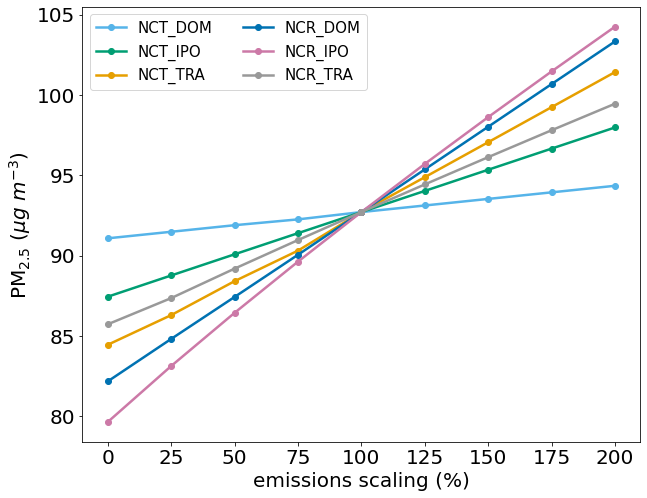

In [20]:
colors=["#56B4E9","#009E73","#E69F00","#0072B2","#CC79A7","#999999"] 

fig, ax = plt.subplots(figsize=[10,8])
# Change the plot dimensions (width, height)
for s,i in zip(sec,colors):
    t = d[d['sectors']==s].sort_values(by='value')
    ax.plot(t.scale_factor,t.value,'o-',label=s,color=i,linewidth=2.5)
    ax.tick_params(axis='both', which='major', labelsize=20)
    plt.xlabel('emissions scaling (%)',fontsize=20) 
    plt.ylabel('PM$_{2.5}$ ($\mu g~m^{-3}$)',fontsize=20) 
plt.legend(loc="top right",ncol=2,fontsize=15)

In [21]:
#fig.savefig('./fig4a.png', format='png', box_inches="tight",dpi=300)

In [22]:
#save linearity coefficients
#d.to_excel('pm25_linear.xlsx')

# PM2.5: hourly values dyno cyle 

In [23]:
pm25h=pd.read_excel('pm25_changes_hour_dyno.xlsx').drop('Unnamed: 0', axis=1) 

In [24]:
pm25h

,sector,hour,scale_factor,value
0,BASE,0,100,95.366737
1,NCT_DOM,0,100,95.366737
2,NCT_IPO,0,100,95.366737
3,NCT_TRA,0,100,95.366737
4,NCR_DOM,0,100,95.366737
...,...,...,...,...
1723,NCT_TRA,23,200,124.632286
1724,NCR_DOM,23,200,128.206787
1725,NCR_IPO,23,200,125.108459
1726,NCR_TRA,23,200,122.816704


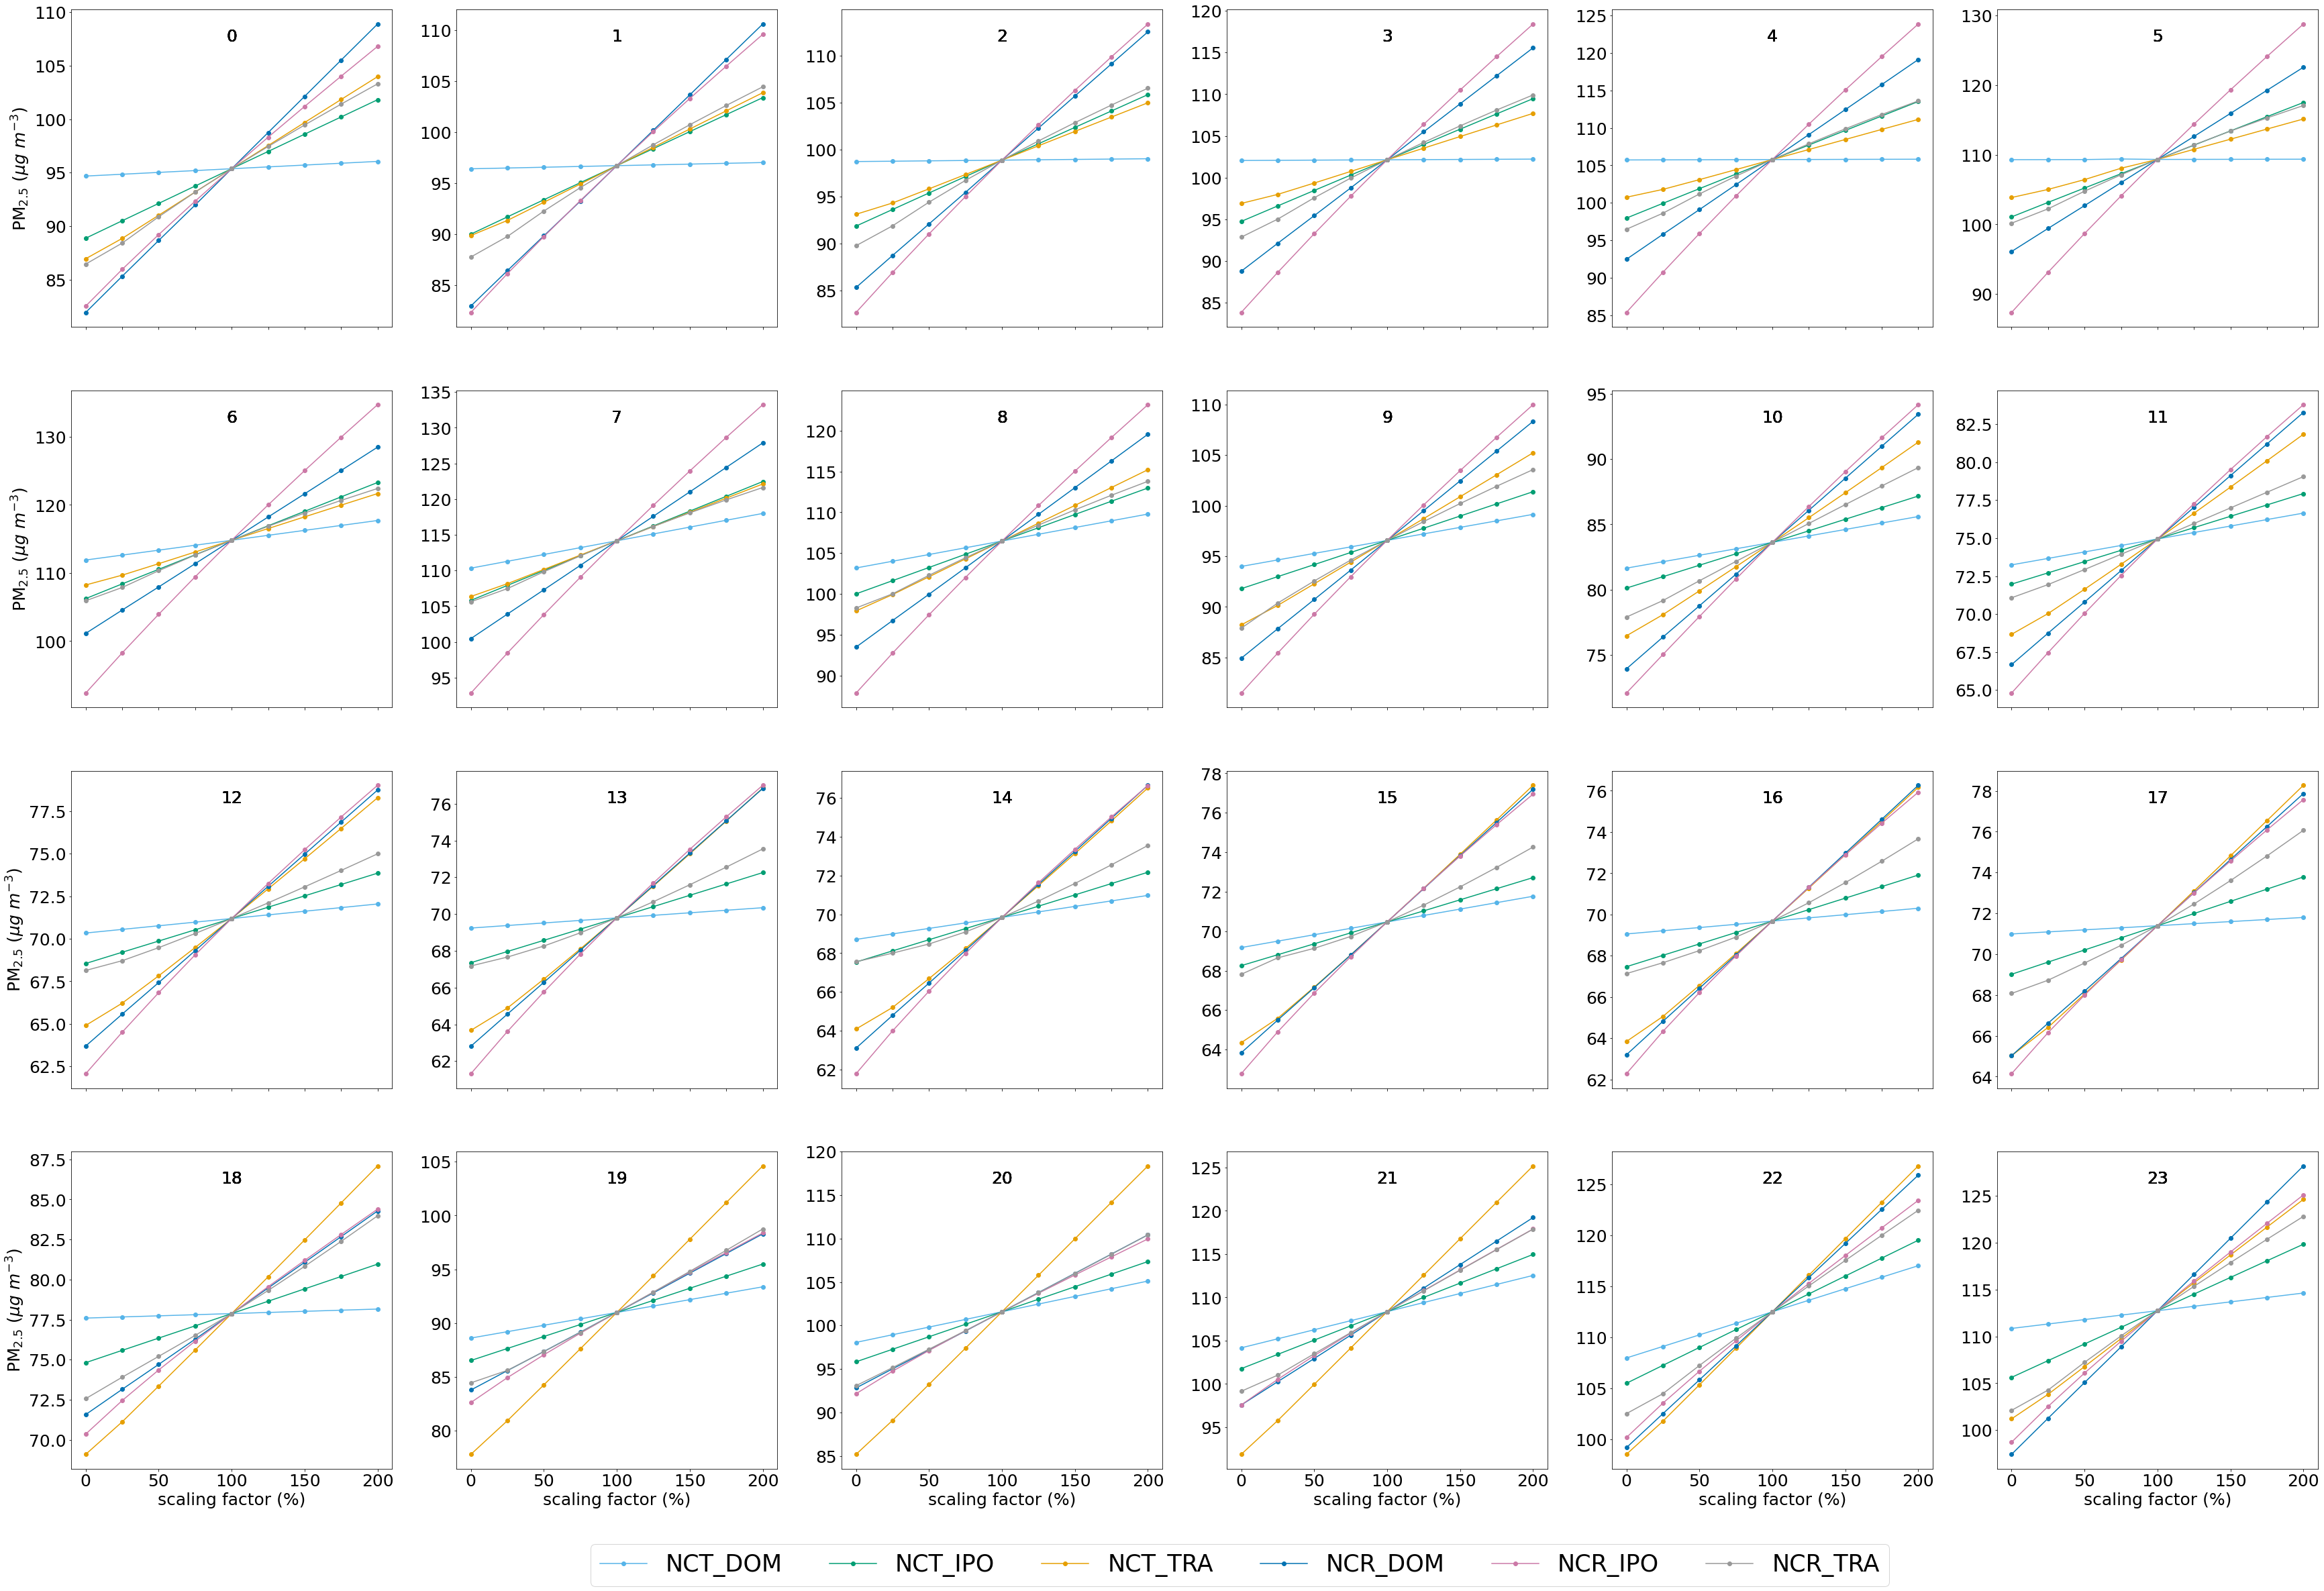

In [25]:
colors=["#56B4E9","#009E73","#E69F00","#0072B2","#CC79A7","#999999"] 
hours=pm25h.hour.unique()
fig, axes = plt.subplots(4,6,figsize=(60,40))
for h,ax in zip(hours,fig.axes): 
    for s,i in zip(sec,colors):
        t = pm25h[(pm25h['sector']==s) & (pm25h['hour']==h)].sort_values(by='scale_factor')
        ax.plot(t.scale_factor,t.value,'o-',label=s,color=i)
        ax.text(.5,.9,h,
        horizontalalignment='center',
        transform=ax.transAxes,fontsize=25)
        ax.tick_params(axis='y', which='major', labelsize=25)

for i,ax in zip(range(0,24),fig.axes):
    if i in [18,19,20,21,22,23]: 
        ax.set_xlabel('scaling factor (%)', fontsize=25)
        ax.tick_params(axis='x', which='major', labelsize=25)
    else:
         ax.set_xticklabels([])
    
    if i in [0,6,12,18]: 
          ax.set_ylabel('PM$_{2.5}$ ($\mu g~m^{-3}$)', fontsize=25)

plt.legend( bbox_to_anchor=(-0.3,-0.2),fontsize=35,ncol=8, loc='bottom left')

In [26]:
#fig.savefig('./figS5.png', format='png', box_inches="tight",dpi=300)